<a href="https://colab.research.google.com/github/sbogde/pandamonium/blob/main/My_WS01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop 01

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
# Loading the 'adult.csv' dataset into a pandas DataFrame called 'data'
# Check if running in Google Colab
# Dynamically set the file path based on the execution environment
if 'google.colab' in str(get_ipython()):
    from google.colab import drive, data_table
    drive.mount('/content/drive', force_remount=True)
    data_path = '/content/drive/My Drive/Colab Notebooks/data-mining/data/adult.csv'
    data_table.enable_dataframe_formatter()
else:
    data_path = './data/adult.csv'  # Local path

Mounted at /content/drive


In [13]:
# Loading the 'adult.csv' dataset into a pandas DataFrame called 'data'
data = pd.read_csv(data_path)

In [14]:
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [15]:
# Define column names as they are not present in the dataset
column_names = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
                "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
                "hours_per_week", "native_country", "income"]

In [16]:
data = pd.read_csv(data_path, names=column_names, na_values="?", skipinitialspace=True)

In [17]:
data.head(1)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [18]:
#The DataFrame.shape property tells you the dimensionality of the dataset (Pandas DataFrame) in the form of the number of rows and columns. In this case, how many rows and columns are needed?
print(f'data shape: {data.shape}')

data shape: (32561, 15)


In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [20]:
data.iloc[14]  # Row indexing starts from 0, so row 15 is index 14

,14
age,40
workclass,Private
fnlwgt,121772
education,Assoc-voc
education_num,11
marital_status,Married-civ-spouse
occupation,Craft-repair
relationship,Husband
race,Asian-Pac-Islander
sex,Male


In [21]:
# ---- Data Preprocessing ----
# Check for missing values
print("\n**Missing Values Before Cleaning:**")
print(data.isnull().sum())


**Missing Values Before Cleaning:**
age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


In [22]:
# Drop rows with missing values
data.dropna(inplace=True)

In [23]:
data.shape

(30162, 15)

In [24]:
#The line below will drop/remove fnlwgt from data.
#drop(): To drop a column from the dataframe, pass agruments - column name to be dropped and axis = 1. axis = 0 is to dropping row.
data = data.drop('fnlwgt', axis=1)

In [25]:
data.shape

(30162, 14)

In [26]:
#value_counts() produces a frequency table, which shows the occurrence of each unique value per feature or attribute in a dataset
data['education'].value_counts()

,count
education,
HS-grad,9840
Some-college,6678
Bachelors,5044
Masters,1627
Assoc-voc,1307
11th,1048
Assoc-acdm,1008
10th,820
7th-8th,557


In [27]:
data['education'].nunique()

16

In [28]:
# Income distribution
income_counts = data['income'].value_counts()
print("\n**Income Distribution:**")
print(income_counts)


**Income Distribution:**
income
<=50K    22654
>50K      7508
Name: count, dtype: int64


In [29]:
# Gender-based income comparison
gender_income = data.groupby(["sex", "income"]).size()
print("\n**Income by Gender:**")
print(gender_income)


**Income by Gender:**
sex     income
Female  <=50K      8670
        >50K       1112
Male    <=50K     13984
        >50K       6396
dtype: int64


In [30]:
# Gender-based income comparison
gender_income = data.groupby(["sex", "income"]).size().unstack()
print("\n**Income by Gender:**")
print(gender_income)


**Income by Gender:**
income  <=50K  >50K
sex                
Female   8670  1112
Male    13984  6396


In [31]:
# Education level vs. Income
education_income = data.groupby(["education", "income"]).size().unstack()
print("\n📌 **Education vs. Income:**")
print(education_income)


📌 **Education vs. Income:**
income         <=50K    >50K
education                   
10th           761.0    59.0
11th           989.0    59.0
12th           348.0    29.0
1st-4th        145.0     6.0
5th-6th        276.0    12.0
7th-8th        522.0    35.0
9th            430.0    25.0
Assoc-acdm     752.0   256.0
Assoc-voc      963.0   344.0
Bachelors     2918.0  2126.0
Doctorate       95.0   280.0
HS-grad       8223.0  1617.0
Masters        709.0   918.0
Preschool       45.0     NaN
Prof-school    136.0   406.0
Some-college  5342.0  1336.0


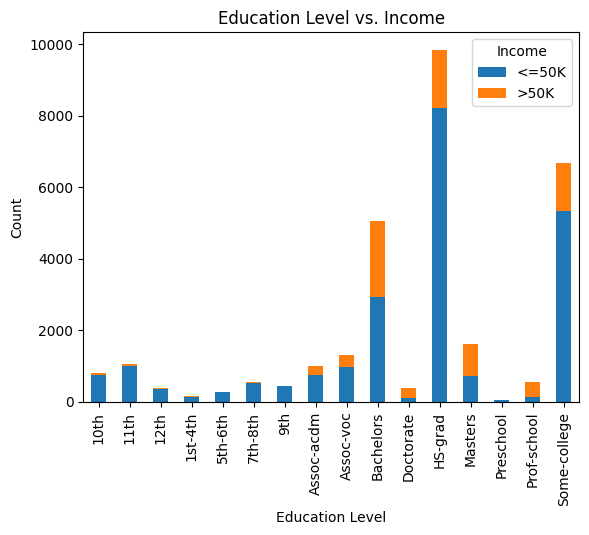

In [32]:
#Data Visualisations
education_income.plot(kind="bar", stacked=True)
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Education Level vs. Income")
plt.legend(title="Income")
plt.show()

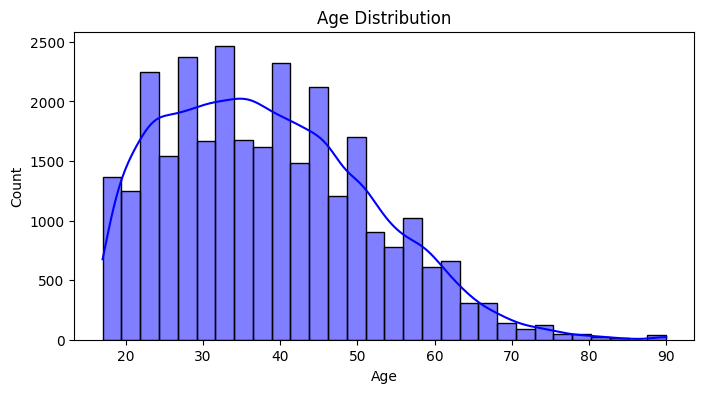

In [33]:
# Age distribution
plt.figure(figsize=(8, 4))
sns.histplot(data['age'], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

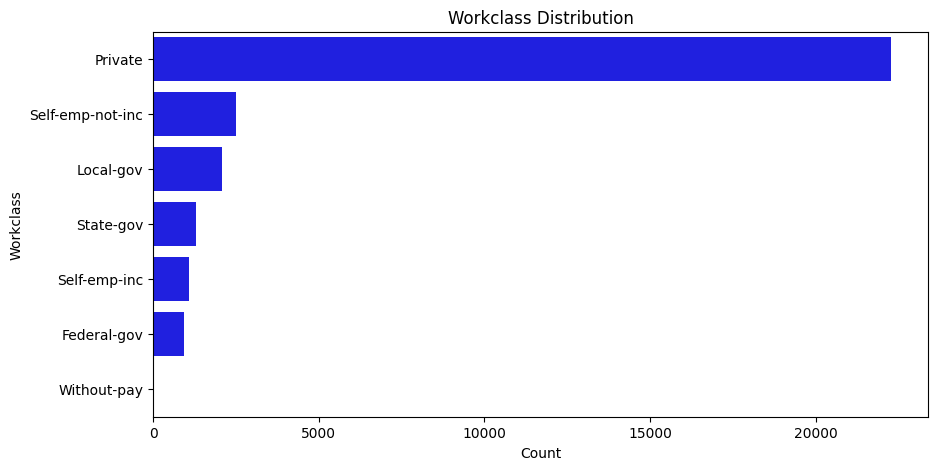

In [34]:
plt.figure(figsize=(10, 5))
sns.countplot(y=data["workclass"], order=data["workclass"].value_counts().index, color="blue")
plt.title("Workclass Distribution")
plt.xlabel("Count")
plt.ylabel("Workclass")
plt.show()

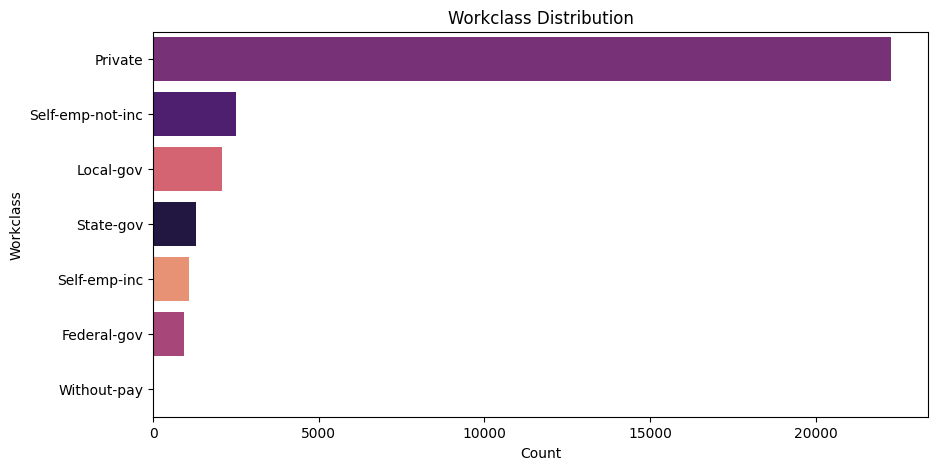

In [35]:
# Income distribution by gender visualization. Create a horizontal bar chart
plt.figure(figsize=(10, 5))
sns.countplot(y=data["workclass"], hue=data["workclass"], order=data["workclass"].value_counts().index, palette="magma", legend=False)
plt.title("Workclass Distribution")
plt.xlabel("Count")
plt.ylabel("Workclass")
plt.show()

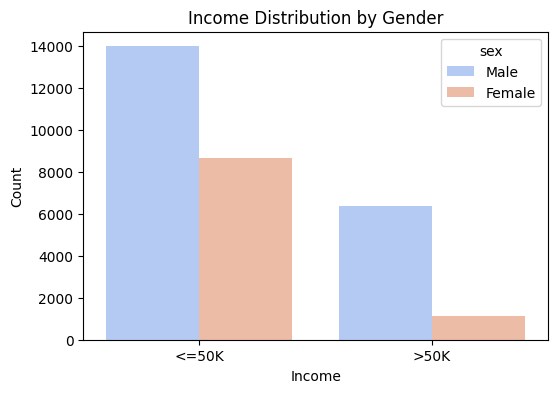

In [36]:
# Income distribution by gender visualization Create a vertical bar chart
plt.figure(figsize=(6, 4))
sns.countplot(x='income', hue='sex', data=data, palette="coolwarm")
plt.title("Income Distribution by Gender")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

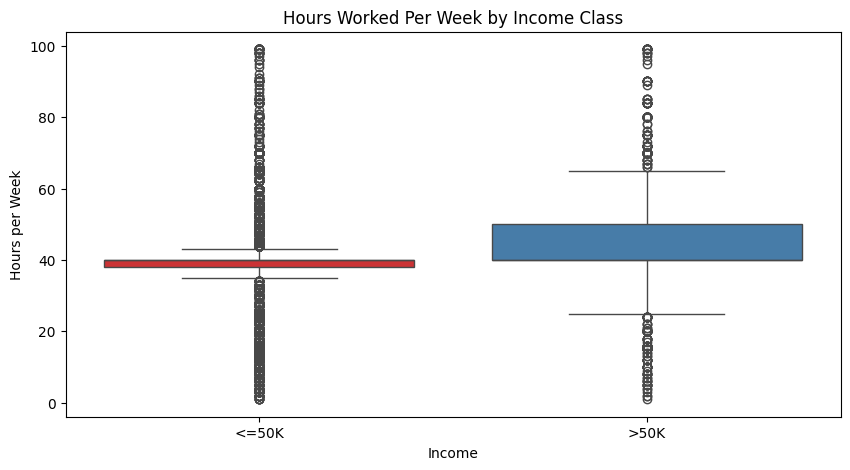

In [37]:
# Hours per week vs Income
plt.figure(figsize=(10, 5))
sns.boxplot(x='income', y='hours_per_week',hue='income', data=data, palette="Set1", dodge=False)
plt.title("Hours Worked Per Week by Income Class")
plt.xlabel("Income")
plt.ylabel("Hours per Week")
plt.show()

In [38]:
# Convert categorical columns into numerical representations
categorical_cols = data.select_dtypes(include=['object']).columns #Identifies categorical columns
df_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True) #Converts categorical variables into numeric form using one-hot encoding #Prevents redundant categories to avoid multicollinearity

In [39]:
df_encoded.shape

(30162, 96)

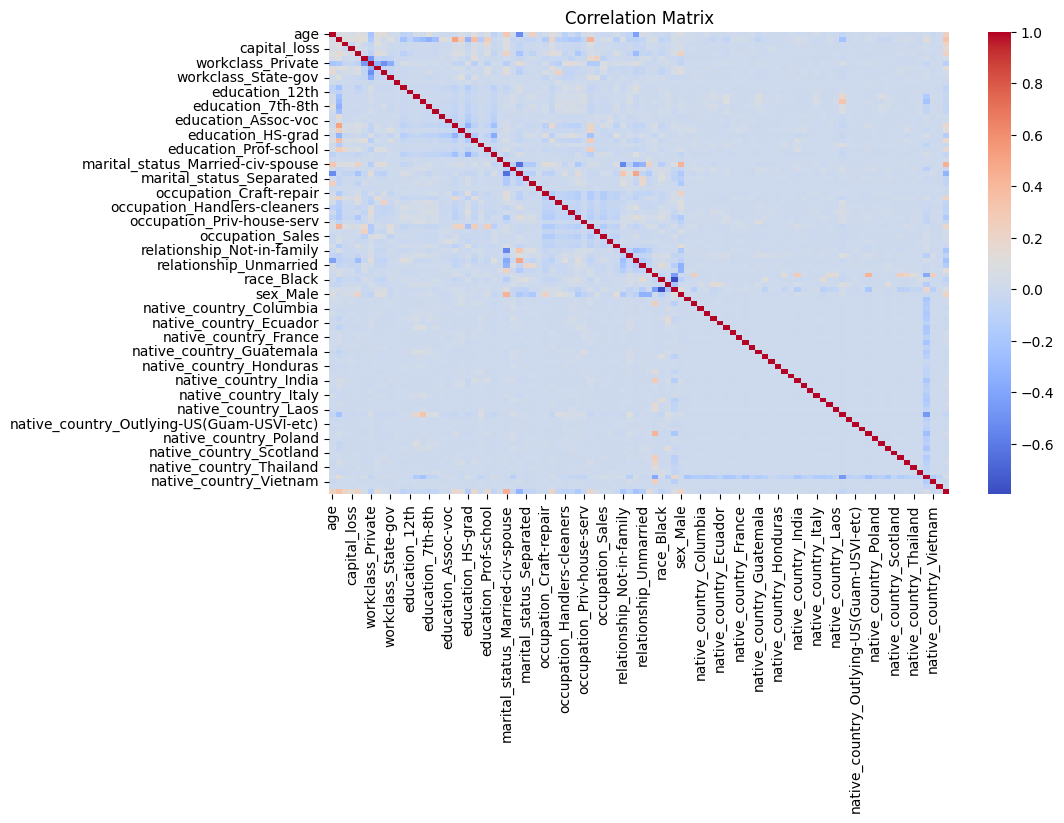

In [40]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

In [41]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["income"] = encoder.fit_transform(data["income"])

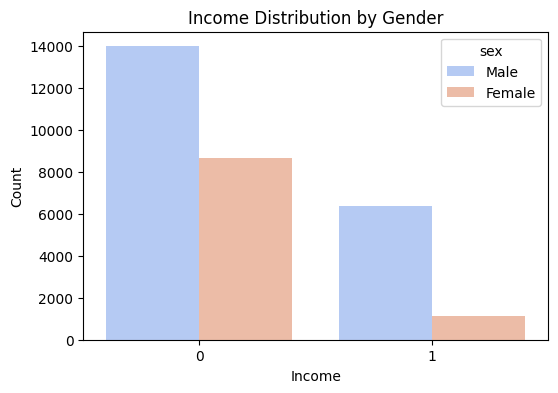

In [42]:
# Income distribution by gender visualization Create a vertical bar chart
plt.figure(figsize=(6, 4))
sns.countplot(x='income', hue='sex', data=data, palette="coolwarm")
plt.title("Income Distribution by Gender")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()